In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline
plt.style.use('default')

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn_data.loc[churn_data['Exited'] == 0, 'Loyal'] = 'Loyal'
churn_data.loc[churn_data['Exited'] == 1, 'Loyal'] = 'Not Loyal'
churn_data.loc[churn_data['IsActiveMember'] == 1, 'Status'] = 'Active'
churn_data.loc[churn_data['IsActiveMember'] == 0, 'Status'] = 'Not Active'
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyal,Status
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not Loyal,Active
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not Loyal,Not Active
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Not Active
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Loyal,Not Active
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Loyal,Active
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Not Loyal,Active
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Not Loyal,Not Active


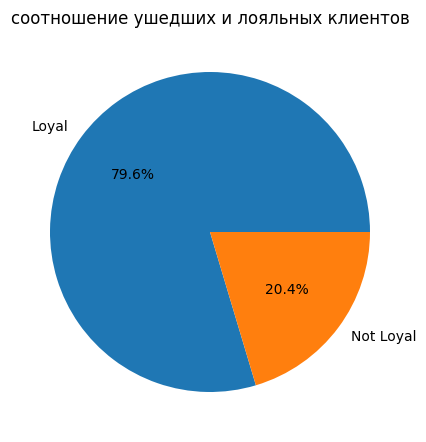

In [4]:
#9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


df1 = churn_data['Loyal'].value_counts()
fig1 = plt.figure(figsize=(10, 4))
axes1 = fig1.add_axes([0, 0, 1, 1])
axes1.pie(
    df1,
    labels=df1.index,
    autopct='%.1f%%'
    
);
axes1.set_title('соотношение ушедших и лояльных клиентов');


График показывает что доля ушедших клиентов составляет пятую часть от общего числа.

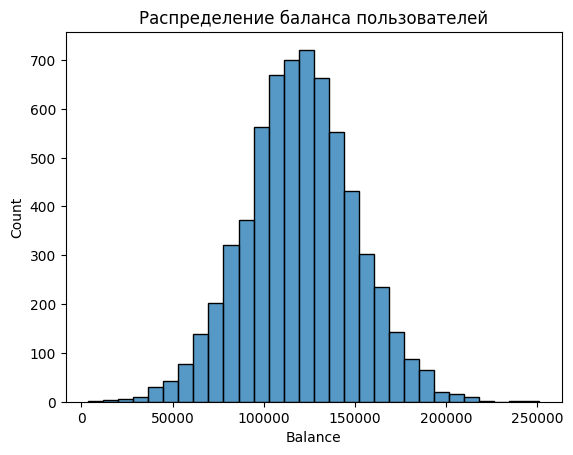

In [24]:
#9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

df2 = churn_data[churn_data['Balance'] > 2500].groupby(by='Balance', as_index=False).value_counts()

sns.histplot(
    df2,
    x='Balance',
    bins=30 
).set_title('Распределение баланса пользователей');



Данный график отображает что основная группа клиентов имеет от 100 тыс. до 150 тыс. на своём балансе

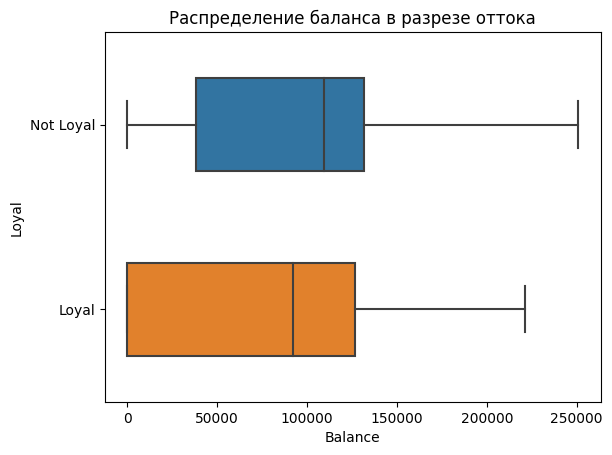

In [25]:
# 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig3 = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Loyal',
    width=0.5,
    
).set_title('Распределение баланса в разрезе оттока');


У ушедших клиентов суммы на счетах в среднем больше чем у лояльных. Возможно это связано с тем что в других банках накопительная ставка выше.

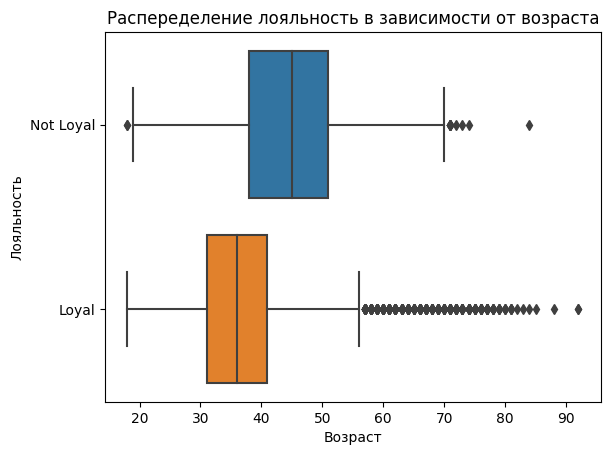

In [37]:
# 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
fig4 = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Loyal'
)
fig4.set_title('Распеределение лояльность в зависимости от возраста')
fig4.set_ylabel('Лояльность')
fig4.set_xlabel('Возраст');


Больше всего выбросов в возрасте от 55. Банку следует обратить винмание на эту группу людей. Наибольшее количество лояльных клиентов имеет возраст 30-40 лет.


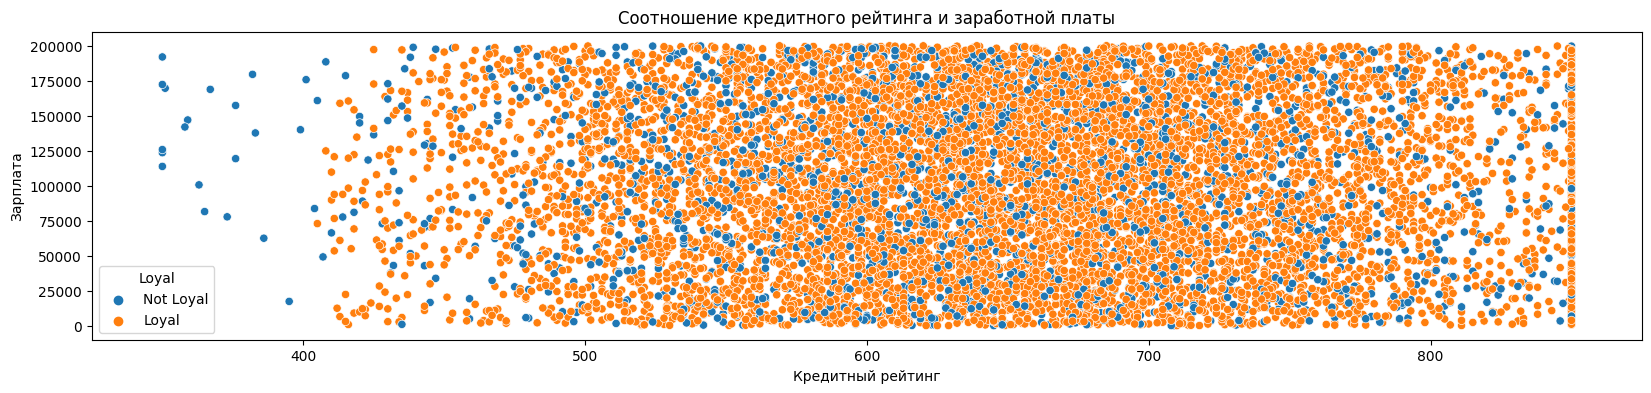

In [62]:
# 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

fig5 = plt.figure(figsize=(20, 4))
axes5 = sns.scatterplot(
    churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Loyal'
)
axes5.set_title('Соотношение кредитного рейтинга и заработной платы');
axes5.set_xlabel('Кредитный рейтинг')
axes5.set_ylabel('Зарплата');


В целом явной взаимосвязи не наблюдается, однако клиенты с кредитным рейтингом ниже 400, независимо от заработной платы, вынуждены уйти из банка. В связи этим я бы предложил банку создать выгодные условия для такой категории чтобы удержать клиентов.

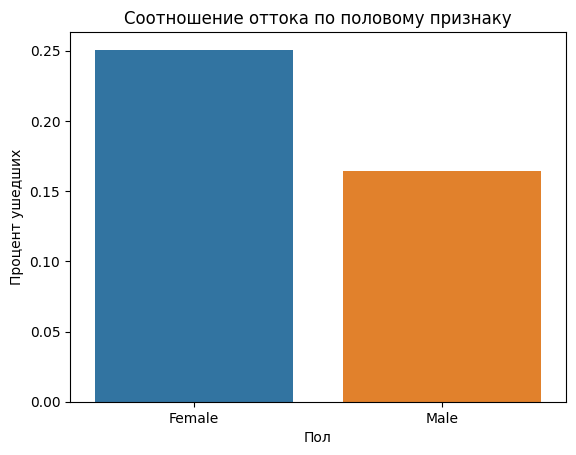

In [54]:
# 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

df6 = churn_data.groupby(by='Gender', as_index=False).mean()
fig6 = sns.barplot(
    data=df6,
    x='Gender',
    y='Exited',
     
)
fig6.set_title('Соотношение оттока по половому признаку')
fig6.set_ylabel('Процент ушедших')
fig6.set_xlabel('Пол');


График показывает что женщины уходят чаще.

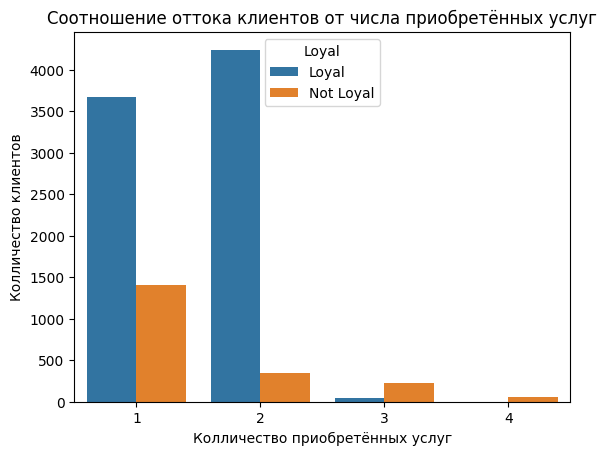

In [70]:
# 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

df7 = churn_data.groupby(by=['NumOfProducts', 'Loyal'], as_index=False).count()
fig7 = sns.barplot(
    data=df7,
    x='NumOfProducts',
    y='CustomerId',
    hue='Loyal'
    
)
fig7.set_title('Соотношение оттока клиентов от числа приобретённых услуг')
fig7.set_ylabel('Колличество клиентов')
fig7.set_xlabel('Колличество приобретённых услуг');


Из графика следует что оптимальное кол-во услуг для клиента банка: 1 - 2. Большее кол-во услуг накладно для клиента и он уходит из банка.

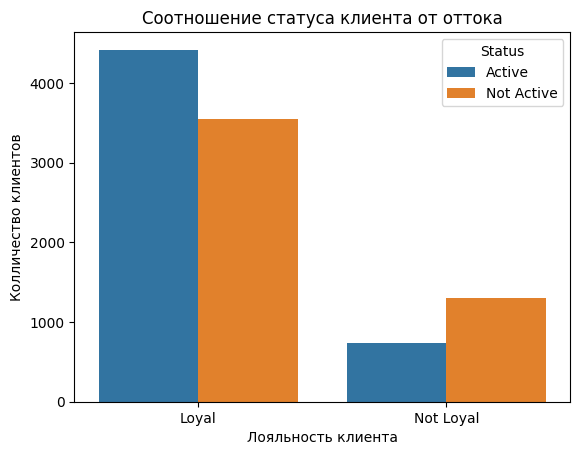

In [7]:
# 9.8 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

df8 = churn_data.groupby(by=['Status', 'Loyal'], as_index=False).count()
fig8 = sns.barplot(
    data=df8,
    x='Loyal',
    y='CustomerId',
    hue='Status'
)
fig8.set_title('Соотношение статуса клиента от оттока')
fig8.set_ylabel('Колличество клиентов')
fig8.set_xlabel('Лояльность клиента');



Среди лояльных клиентов, активных больше неактивных примерно на 20%. Среди нелояльных, ситуация меняется в обратную сторону. Общая доля неактивных клиентов примерно 50%, банку следует создать различные кэшбеки от покупок, различные бонусы и проценты по остаткам в зависимости от кредитного рейтинга.

In [136]:
# 9.9  В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

df9 = churn_data.groupby(by='Geography', as_index=False).mean()
fig9 = px.choropleth(
    df9,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    title='Доля ушедших клиентов',
    width=800,
    height=500
)
fig9.show()


Больше всего ушло клиентов на территории Германии. Возможно это связано с политикой внутри страны.

In [9]:
# 9.10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, 
# в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

# На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


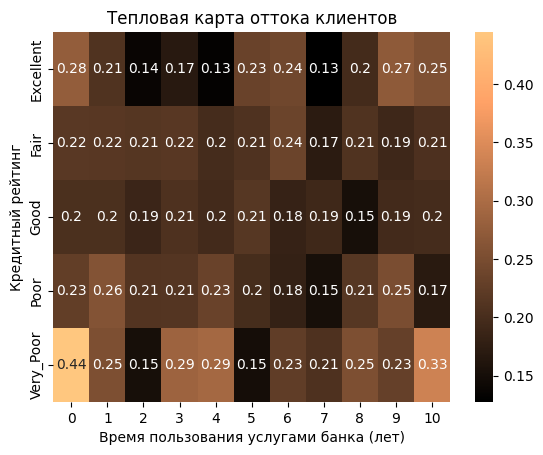

In [10]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
df10 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
heatmap = sns.heatmap(
    data=df10,
    annot=True,
    cmap='copper'
)
heatmap.set_title('Тепловая карта оттока клиентов')
heatmap.set_xlabel('Время пользования услугами банка (лет)')
heatmap.set_ylabel('Кредитный рейтинг');


В категории Very_Poor(кредит. рейтинг менше 500) наибольшая доля оттока клиентов. 